#Assignment 3:
    test if the distribution of ages can be modelled by a Gaussian
    
    1) all riders
    
    2) summer riders vs winder riders
    
    use 2 tests, you can use KS, AD, or get creative. use KL or chi2 like you did in Assignment2 or perhaps new ones!
    
    CHALLANGE! look for a better distribution to fit the data! see notes on how to input a number of different 
    distributions into the test, not just 'norm' and the few others available by keyword

my usual imports and setups

In [52]:
import pylab as pl
import pandas as pd
import numpy as np
%pylab inline

import os

#this makes my plots pretty! but it is totally not mandatory to do it
import json
s = json.load( open(os.getenv ('PUI2015')+"/fbb_matplotlibrc.json") )
pl.rcParams.update(s)

#i know i will use scipy for the tests
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


I need 2 seasons, lets start reading in data from January 2015, and June 2015. 
One month is not a season. You should import data from other months in the winter as well, and then several summer months to get the other distribution. I am being lazy but you should not be. 



In [53]:
#df_W=pd.read_csv(os.getenv ('PUI2015')+'/notebooks/data/201501-citibike-tripdata.csv')
#print df_W.columns
#df_S=pd.read_csv(os.getenv ('PUI2015')+'/notebooks/data/201506-citibike-tripdata.csv')
#print df_S.columns

In [48]:
df_Nov = pd.read_csv(os.getenv ('PUI2015')+'/notebooks/data/201411-citibike-tripdata.csv')
df_Dec = pd.read_csv(os.getenv ('PUI2015')+'/notebooks/data/201412-citibike-tripdata.csv')
df_Jan = pd.read_csv(os.getenv ('PUI2015')+'/notebooks/data/201501-citibike-tripdata.csv')
df_Feb = pd.read_csv(os.getenv ('PUI2015')+'/notebooks/data/201502-citibike-tripdata.csv')
df_May = pd.read_csv(os.getenv ('PUI2015')+'/notebooks/data/201505-citibike-tripdata.csv')
df_Jun = pd.read_csv(os.getenv ('PUI2015')+'/notebooks/data/201506-citibike-tripdata.csv')
df_Jul = pd.read_csv(os.getenv ('PUI2015')+'/notebooks/data/201507-citibike-tripdata.csv')
df_Aug = pd.read_csv(os.getenv ('PUI2015')+'/notebooks/data/201508-citibike-tripdata.csv')

In [54]:
df_W = pd.concat([df_Nov,df_Dec,df_Jan,df_Feb],ignore_index=True)
df_S = pd.concat([df_May,df_Jun,df_Jul,df_Aug],ignore_index=True)

## get the age like we did before, subscribers only cause otherwise the ages are really sparse anyways


In [55]:
#df is the dataframe where the content of the csv file is stored
df_W['age'] = 2015-df_W['birth year'][(df_W['usertype'] == 'Subscriber')]
df_S['age'] = 2015-df_S['birth year'][(df_S['usertype'] == 'Subscriber')]

lets split age in 10 year bins. see the comment in assignment 1 about this

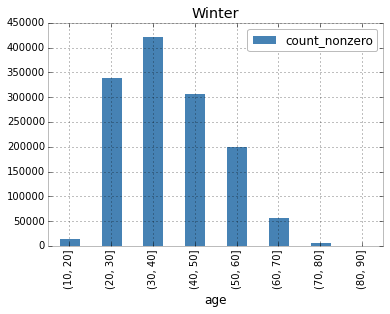

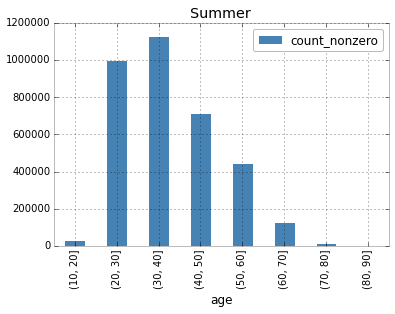

In [56]:
bins = np.arange(10, 99, 10)
df_W.age.groupby(pd.cut(df_W.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Winter")
W_age_dist = df_W.age.groupby(pd.cut(df_W.age, bins)).agg([count_nonzero])
df_S.age.groupby(pd.cut(df_S.age, bins)).agg([count_nonzero]).plot(kind='bar', title="Summer")
S_age_dist = df_S.age.groupby(pd.cut(df_S.age, bins)).agg([count_nonzero])

how do they look? what should I expect? setting some expectation is useful as a sanity check!

lets run the scipy KS test

#KS testsfor goodness of fit

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kstest.html

In [58]:
#compare to normal

def mynorm (x, mu, var):
    return scipy.stats.norm.cdf(x, loc=mu, scale=var)

ksW=scipy.stats.kstest(W_age_dist, mynorm, args=(W_age_dist.mean(), W_age_dist.std()))
ksS=scipy.stats.kstest(S_age_dist, mynorm, args=(S_age_dist.mean(), S_age_dist.std()))
print "winter, normal fit", ksW
print "summer, normal fit", ksS

#compare to Cauchy 

ksW=scipy.stats.kstest(W_age_dist, 'cauchy')
ksS=scipy.stats.kstest(S_age_dist, 'cauchy')
print "winter, normal fit", ksW
print "summer, normal fit", ksS

winter, normal fit KstestResult(statistic=0.93089216342442138, pvalue=1.040515007488807e-09)
summer, normal fit KstestResult(statistic=0.93322095767140723, pvalue=7.9095441307686087e-10)
winter, normal fit KstestResult(statistic=0.9999992478695352, pvalue=0.0)
summer, normal fit KstestResult(statistic=0.99999971757503048, pvalue=0.0)


the scipy KS test works with keywords only for scipy.stats distributions 
that take as a single argument the size of the sample, like norm and cauchy look them up to make sure I am right!
if i want to test against a distribution which takes more arguments like Poisson, which in scipy.stats takes the 
lambda parameter and the size (2 arguments) i can pass the extra arguments in arg, like i do below: 

In [59]:
ksW=scipy.stats.kstest(W_age_dist, 'gamma', args=(35,))
ksS=scipy.stats.kstest(S_age_dist, 'gamma', args=(35,))

print "winter, normal fit", ksW
print "summer, normal fit", ksS

winter, normal fit KstestResult(statistic=1.0, pvalue=0.0)
summer, normal fit KstestResult(statistic=1.0, pvalue=0.0)


or i can create my function separately, then call it: all i need to do is define a function that calls  like i am doing below. the size argument must come first, and the second argument of kstest will no longer be a string, but the function itself (what we would call a "callable")

In [60]:
def mydistribution(size, m0, m1):
    #this is a crazy dumb function, but i am trying to make a point here...
    return (np.empty_like(size)+1) * m0 **2

In [14]:
ksW=scipy.stats.kstest(W_age_dist, mydistribution, args=(35,38))
ksS=scipy.stats.kstest(S_age_dist, mydistribution, args=(35,38))

print "winter, normal fit", ksW
print "summer, normal fit", ksS

winter, normal fit KstestResult(statistic=319324425.0, pvalue=nan)
summer, normal fit KstestResult(statistic=107543975.0, pvalue=nan)


##TODO FOR YOU!

-- repeat with the AD test, and/or any other tests you wish

-- do you see differences in the sample? significant differences?

-- do you dare (and this is indeed optional but could be fun) splitting the samples by up- and down-town?

In [61]:
aW=scipy.stats.anderson(df_W['age'], dist='norm')
aS=scipy.stats.anderson(df_S['age'], 'norm')
print "winter, normal fit", aW
print "summer, normal fit", aS

#compare to Logistic 

aW=scipy.stats.anderson(df_W['age'], 'logistic')
aS=scipy.stats.anderson(df_S['age'], 'logistic')
print "winter, normal fit", aW
print "summer, normal fit", aS

winter, normal fit AndersonResult(statistic=nan, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
summer, normal fit AndersonResult(statistic=nan, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))
winter, normal fit AndersonResult(statistic=nan, critical_values=array([ 0.426,  0.563,  0.66 ,  0.769,  0.906,  1.01 ]), significance_level=array([ 25. ,  10. ,   5. ,   2.5,   1. ,   0.5]))
summer, normal fit AndersonResult(statistic=nan, critical_values=array([ 0.426,  0.563,  0.66 ,  0.769,  0.906,  1.01 ]), significance_level=array([ 25. ,  10. ,   5. ,   2.5,   1. ,   0.5]))


In [62]:
dist = df_W['age']

pos_samples=np.random.poisson(40.048581, 285552)   
mybins=np.linspace(min(dist),max(dist), 10) 
bincenters = mybins[:-1]+0.5*(mybins[1]-mybins[0])
pos_kl =  scipy.stats.entropy(np.histogram(pos_samples, bins=mybins)[0], scipy.stats.norm.pdf(bincenters, loc=40.048581, scale=40.048581))    

print pos_kl

0.880113758735
